# 서울시 화재 발생 원인 분석

In [73]:
import pandas as pd
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import json
import folium
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import datetime

In [74]:
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

### 구 매핑 코드

In [75]:
code2name = {
    110 : '종로구' ,    140 : '중구',    170 : '용산구',    200 : '성동구',    215 : '광진구',    230 : '동대문구',
    260 : '중랑구',     290 : '성북구',    305 : '강북구',    320 : '도봉구',    350 : '노원구',    380 : '은평구',
    410 : '서대문구',    440 : '마포구',    470 : '양천구',    500 : '강서구',    530 : '구로구',    545 : '금천구',
    560 : '영등포구',    590 : '동작구',    620 : '관악구',    650 : '서초구',    680 : '강남구',    710 : '송파구',
    740 : '강동구'
}

## 화재 건수 데이터

In [76]:
df = pd.read_csv('seoul_fire_case.csv', index_col = 'Date',parse_dates=[0]).sort_index()


### 서울시 전체 건수

In [77]:
df_seoul = df[['HouseType', 'Cnt', 'DamageAmt', 'DeathToll', 'Injury']].groupby('Date').sum()

In [78]:
df_seoul['Month'] =  pd.DatetimeIndex(df_seoul.index).month

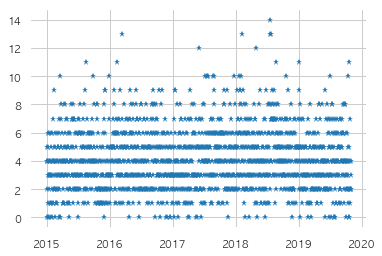

In [79]:
plt.plot(df_seoul['Cnt'],'*')

## 구별 화재 발생 건수

In [80]:
df['Month'] = pd.DatetimeIndex(df.index).month
df['Year'] = pd.DatetimeIndex(df.index).year


In [81]:
df_2015 = df[df.Year == 2015 ].groupby(['Month', 'GugunCode']).sum().reset_index()
df_2016 = df[df.Year == 2016 ].groupby(['Month', 'GugunCode']).sum().reset_index()
df_2017 = df[df.Year == 2017 ].groupby(['Month', 'GugunCode']).sum().reset_index()
df_2018 = df[df.Year == 2018 ].groupby(['Month', 'GugunCode']).sum().reset_index()
df_2019 = df[df.Year == 2019 ].groupby(['Month', 'GugunCode']).sum().reset_index()

In [82]:
df_2015['District'] = df_2015['GugunCode'].apply(lambda x: code2name[x])
df_2016['District'] = df_2016['GugunCode'].apply(lambda x: code2name[x])
df_2017['District'] = df_2017['GugunCode'].apply(lambda x: code2name[x])
df_2018['District'] = df_2018['GugunCode'].apply(lambda x: code2name[x])
df_2019['District'] = df_2019['GugunCode'].apply(lambda x: code2name[x])

In [83]:
yearly_cnt_2015 = df_2015.groupby('District').sum()['Cnt']
yearly_cnt_2016 = df_2016.groupby('District').sum()['Cnt']
yearly_cnt_2017= df_2017.groupby('District').sum()['Cnt']
yearly_cnt_2018= df_2018.groupby('District').sum()['Cnt']
yearly_cnt_2019 = df_2019.groupby('District').sum()['Cnt']

In [84]:
frame = {'2015': yearly_cnt_2015, 
         '2016': yearly_cnt_2016,
         '2017': yearly_cnt_2017,
         '2018': yearly_cnt_2018,
         '2019': yearly_cnt_2019
        } 
  
yearly_cnt = pd.DataFrame(frame) 
yearly_cnt.head()

,2015,2016,2017,2018,2019
District,,,,,
강남구,116,114,103,91,64
강동구,59,94,69,86,58
강북구,38,42,37,44,43
강서구,102,104,148,148,99
관악구,49,69,63,65,45


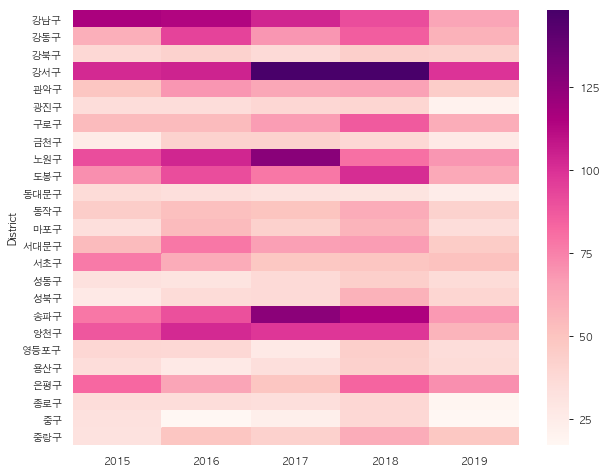

In [85]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(yearly_cnt,cmap='RdPu')
plt.show()
heat_map.figure.savefig('구별_화재발생건수_추이.png')

In [86]:
yearly_cnt2 = yearly_cnt[:]
yearly_cnt2['average'] = yearly_cnt2.mean(axis=1)
yearly_cnt2 = yearly_cnt2.reset_index()
yearly_cnt2.head()

/Users/parkmh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,District,2015,2016,2017,2018,2019,average
0,강남구,116,114,103,91,64,97.6
1,강동구,59,94,69,86,58,73.2
2,강북구,38,42,37,44,43,40.8
3,강서구,102,104,148,148,99,120.2
4,관악구,49,69,63,65,45,58.2


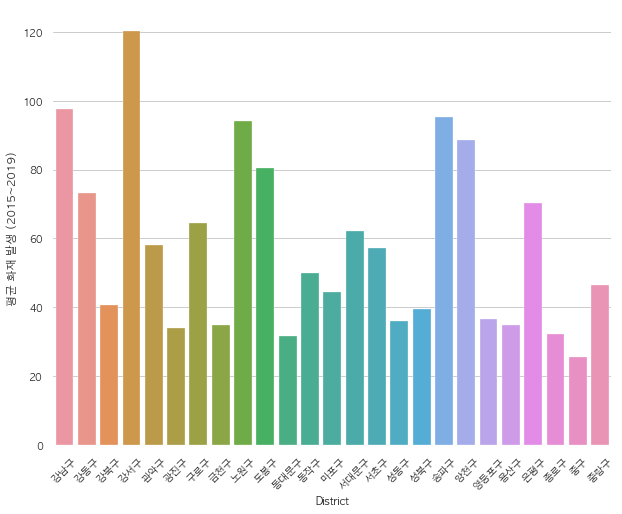

In [87]:
plt.figure(figsize=(10,8))

bar_plot = sns.barplot(x='District',y='average',data=yearly_cnt2)
plt.xticks(rotation=45)
plt.ylabel('평균 화재 발생 (2015~2019)')
plt.show()

## 월별 발생 건수

In [88]:
grouped = df.groupby(['Year','Month']).sum().reset_index()

In [89]:
monthly_cnt = grouped[grouped.Year == 2015][['Month','Cnt']].set_index('Month')
monthly_cnt['2016'] = grouped[grouped.Year == 2016][['Month','Cnt']].set_index('Month')
monthly_cnt['2017'] = grouped[grouped.Year == 2017][['Month','Cnt']].set_index('Month')
monthly_cnt['2018'] = grouped[grouped.Year == 2018][['Month','Cnt']].set_index('Month')
monthly_cnt['2019'] = grouped[grouped.Year == 2019][['Month','Cnt']].set_index('Month')
monthly_cnt.columns = ['2015','2016','2017','2018','2019']
monthly_cnt.fillna(0)

,2015,2016,2017,2018,2019
Month,,,,,
1,92,139,114,164,129.0
2,89,129,110,136,95.0
3,127,142,108,124,111.0
4,113,124,122,140,111.0
5,119,132,114,118,119.0
6,114,130,124,111,114.0
7,137,128,155,181,128.0
8,133,117,149,177,121.0
9,135,147,129,136,143.0


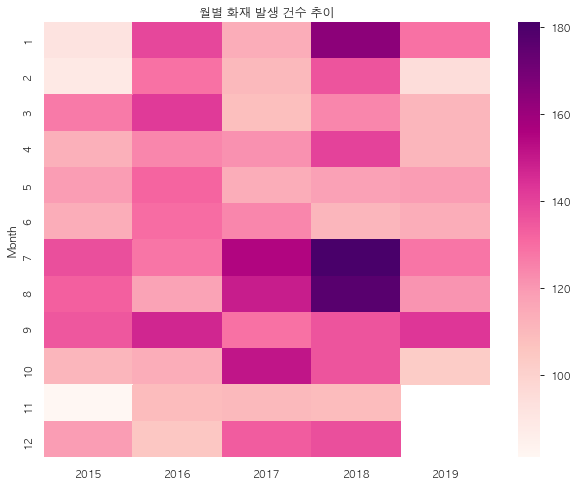

In [90]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(monthly_cnt,cmap='RdPu')
plt.title('월별 화재 발생 건수 추이')
plt.show()
heat_map.figure.savefig('월별_화재발생건수_추이.png')

## 전기사용량

In [91]:
ele_df = pd.read_csv('electricity_consumption_from_2015.csv',encoding='euc-kr',dtype={'Month':'str'})
# ele_df = pd.read_csv('electricity_usage.csv', index_col = 'Month',parse_dates=[0]).sort_index()



In [92]:
df2 = df[:]

In [93]:
df2['YearMonth'] = pd.DatetimeIndex(df2.index).strftime('%Y%m')

/Users/parkmh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
groupbyDistrict = df2.groupby(['GugunCode','YearMonth']).sum().reset_index()

In [95]:
groupbyDistrict['District'] = groupbyDistrict['GugunCode'].apply(lambda x: code2name[x])

In [96]:
merged = ele_df.merge(groupbyDistrict,left_on=['Month','District'],right_on=['YearMonth','District'],how='left')

In [97]:
merged.head()

,Month_x,City,District,ContractType,HouseCnt,Amnt,Price,AvgPrice,GugunCode,YearMonth,Cnt,DamageAmt,DeathToll,Injury,Month_y,Year
0,201501,서울특별시,강남구,주택용,135991,77400293,11866360491,153.3,680,201501,9,59174,0,1,186,374790
1,201501,서울특별시,강동구,주택용,105662,51604917,7112806876,137.8,740,201501,4,1471,0,0,186,374790
2,201501,서울특별시,강북구,주택용,109986,36897738,4979534317,135.0,305,201501,4,45355,0,0,186,374790
3,201501,서울특별시,강서구,주택용,157907,65841317,8812346483,133.8,500,201501,9,8904,0,0,186,374790
4,201501,서울특별시,관악구,주택용,199136,58189980,7380914248,126.8,620,201501,3,407,0,0,186,374790


In [98]:
np.corrcoef(merged['Amnt'],merged['Cnt'])

array([[1.        , 0.50114159],
       [0.50114159, 1.        ]])

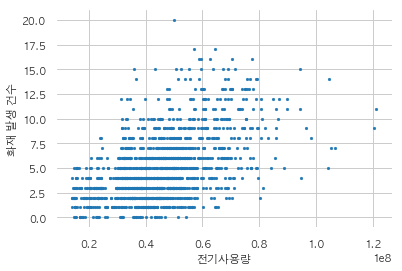

In [99]:
plt.scatter(merged['Amnt'],merged['Cnt'],s=8)
plt.xlabel('전기사용량');
plt.ylabel('화재 발생 건수');
plt.savefig('전기사용량_화재_관계.png')

In [100]:
# merged.profile_report()

## 1인가구

In [101]:
la_df = pd.read_csv('seoul_livingalone.csv')

la_df.head()

,Year,District,Sex,Ages,GeneralFamily,LivingAlone,Percentage
0,2015,종로구,남자,20~24세,1316.0,1122.0,0.85
1,2015,종로구,남자,25~29세,2587.0,2001.0,0.77
2,2015,종로구,남자,30~34세,2877.0,1540.0,0.54
3,2015,종로구,남자,35~39세,3065.0,951.0,0.31
4,2015,종로구,남자,40~44세,4217.0,983.0,0.23


In [102]:
df3=df2[['GugunCode','Year','Cnt','DeathToll','Injury']].groupby(['GugunCode','Year']).sum().reset_index()
df3['District'] = df3['GugunCode'].apply(lambda x: code2name[x])

In [103]:
la_df_group1 = la_df[['Year', 'District', 'Sex', 'Ages', 'GeneralFamily', 'LivingAlone']].groupby(['Year','District']).sum()
la_df_group2 = la_df[['Year', 'District', 'Percentage']].groupby(['Year','District']).mean()

In [104]:
la_df_modified = la_df_group1.merge(la_df_group2,on=['Year','District'],how='left').reset_index()

In [105]:
la_df_modified.head()

,Year,District,GeneralFamily,LivingAlone,Percentage
0,2015,강남구,422126.0,123259.0,0.374000
1,2015,강동구,327949.0,79581.0,0.350667
2,2015,강북구,251082.0,71348.0,0.371667
3,2015,강서구,434876.0,113619.0,0.357333
4,2015,관악구,456132.0,199510.0,0.439667


In [106]:
livingalone_df = la_df_modified.merge(df3, on = ['Year','District'], how='left')

In [107]:
livingalone_df[['Cnt','LivingAlone']].corr()

,Cnt,LivingAlone
Cnt,1.000000,0.295192
LivingAlone,0.295192,1.000000


In [108]:
livingalone_df.head()

,Year,District,GeneralFamily,LivingAlone,Percentage,GugunCode,Cnt,DeathToll,Injury
0,2015,강남구,422126.0,123259.0,0.374000,680,116,0,3
1,2015,강동구,327949.0,79581.0,0.350667,740,59,0,1
2,2015,강북구,251082.0,71348.0,0.371667,305,38,0,5
3,2015,강서구,434876.0,113619.0,0.357333,500,102,0,0
4,2015,관악구,456132.0,199510.0,0.439667,620,49,3,2


In [109]:
subset = livingalone_df[livingalone_df['Year']==2018]
subset = livingalone_df

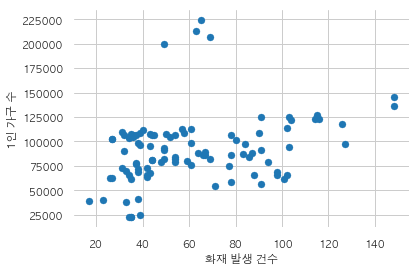

In [110]:
plt.scatter(subset['Cnt'],subset['LivingAlone'])
plt.xlabel('화재 발생 건수')
plt.ylabel('1인 가구 수')
plt.savefig('1인가구수_화재발생건수_관계.png')

In [111]:
# livingalone_df.profile_report()

In [112]:
year_summary = livingalone_df.groupby('Year').sum().reset_index()
year_summary.head()

,Year,GeneralFamily,LivingAlone,Percentage,GugunCode,Cnt,DeathToll,Injury
0,2015,7492949.0,2194991.0,9.493595,10415,1370,8,68
1,2016,7492976.0,2239948.0,9.602071,10415,1516,16,65
2,2017,7549323.0,2323252.0,9.690833,10415,1520,9,79
3,2018,7600632.0,2419029.0,9.785976,10415,1669,12,94


In [113]:
path = '/Library/Fonts/NanumBarunpenRegular.otf'
fontprop = font_manager.FontProperties(fname=path, size=18)


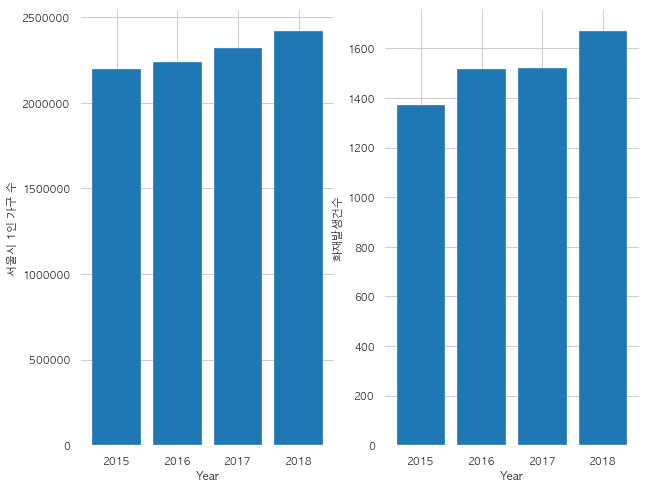

In [122]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.bar(year_summary['Year'],year_summary['LivingAlone'])
plt.xticks([2015,2016,2017,2018]);
plt.xlabel('Year');
plt.ylabel('서울시 1인 가구 수')

plt.subplot(122)
plt.bar(year_summary['Year'],year_summary['Cnt'])
plt.xticks([2015,2016,2017,2018]);
plt.xlabel('Year');
plt.ylabel('화재발생건수');


## 날씨 데이터

In [110]:
# weather_df = pd.read_csv('weather_all.csv',dtype={'Temperature':'float32','WindSpeed':'float32','Humidity':'float32'})
weather_df = pd.read_csv('weather_all.csv')

In [111]:
weather_df.WindSpeed.unique()

array([2.4, 2.1, 1.4, 1.8, 1.3, 2.5, 1.2, 1. , 2.6, 1.7, 1.6, 2. , 3.4,
       4.4, 3.2, 2.9, 1.1, 1.5, 0.8, 3.3, 3.1, 2.8, 2.2, 0.4, 0.9, 0.7,
       1.9, 2.7, 3.9, 0.2, 2.3, 3. , 4.5, 4.3, 5.7, 5. , 3.7, 5.5, 0.5,
       0.3, 0.6, 3.5, 4.6, 4. , 8.1, 7.5, 4.2, 6.7, 3.6, 5.6, 4.8, 6. ,
       3.8, 5.8, 6.2, 5.1, 7. , 0. , 0.1, 5.3, 4.1, 5.4, 4.9, 6.6, 5.2,
       4.7, 7.4, 8. , 5.9, 6.5, 7.3, 6.3, 6.8, 6.1, 6.9, 6.4, 7.1, 8.2,
       nan, 8.5, 9.1, 9.4, 7.8, 7.9])

In [112]:
weather_df[weather_df.WindSpeed == '\xa0']

/Users/parkmh/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Timestamp,Temperature,WindSpeed,Humidity


In [113]:
weather_df.head()

,Timestamp,Temperature,WindSpeed,Humidity
0,201701010000,0.2,2.4,79.0
1,201701010200,-0.3,2.1,81.0
2,201701010400,-1.1,1.4,85.0
3,201701010600,-1.5,1.8,87.0
4,201701010800,-1.3,1.3,87.0


In [114]:
weather_df['Date'] = weather_df['Timestamp'].apply(lambda x:datetime.datetime.strptime(str(x)[:8],'%Y%m%d'))
weather_df['Time'] = weather_df['Timestamp'].apply(lambda x:str(x)[8:12])
weather_df.head()

,Timestamp,Temperature,WindSpeed,Humidity,Date,Time
0,201701010000,0.2,2.4,79.0,2017-01-01,0000
1,201701010200,-0.3,2.1,81.0,2017-01-01,0200
2,201701010400,-1.1,1.4,85.0,2017-01-01,0400
3,201701010600,-1.5,1.8,87.0,2017-01-01,0600
4,201701010800,-1.3,1.3,87.0,2017-01-01,0800


In [115]:
daily_max_weather_df = weather_df.groupby('Date').max()
daily_max_weather_df.head()

,Timestamp,Temperature,WindSpeed,Humidity,Time
Date,,,,,
2017-01-01,201701012200,6.8,2.6,87.0,2200
2017-01-02,201701022200,9.2,4.4,89.0,2200
2017-01-03,201701032200,7.0,3.3,83.0,2200
2017-01-04,201701042200,8.5,3.9,77.0,2200
2017-01-05,201701052200,7.0,5.7,60.0,2200


In [116]:
merged = daily_max_weather_df.merge(df_seoul,on='Date',how='left')
merged.head()

,Timestamp,Temperature,WindSpeed,Humidity,Time,Cnt,DamageAmt,DeathToll,Injury,Month
Date,,,,,,,,,,
2017-01-01,201701012200,6.8,2.6,87.0,2200,3,4073,0,0,1
2017-01-02,201701022200,9.2,4.4,89.0,2200,2,8239,0,0,1
2017-01-03,201701032200,7.0,3.3,83.0,2200,3,5417,0,0,1
2017-01-04,201701042200,8.5,3.9,77.0,2200,3,275,0,0,1
2017-01-05,201701052200,7.0,5.7,60.0,2200,1,458,0,0,1


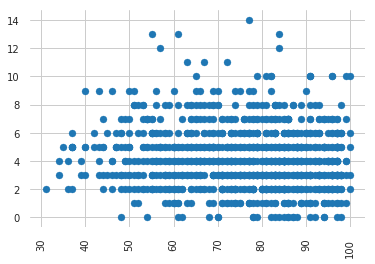

In [117]:
# merged.profile_report()
plt.scatter(merged['Humidity'],merged['Cnt'])
plt.xticks(rotation=90);

In [118]:

list_feat = ['Temperature', 'WindSpeed', 'Humidity']

In [119]:
dfdt.index = np.arange(len(dfdt.index))
dfdt[['Temperature', 'WindSpeed', 'Humidity','Cnt']]

,Temperature,WindSpeed,Humidity,Cnt
0,6.8,2.6,87.0,3
1,9.2,4.4,89.0,2
2,7.0,3.3,83.0,3
3,8.5,3.9,77.0,3
4,7.0,5.7,60.0,1
5,11.0,5.5,70.0,0
6,9.4,2.4,85.0,2
7,10.6,4.5,75.0,3
8,4.0,4.6,77.0,7
9,0.8,8.1,64.0,4


['Temperature', 'WindSpeed', 'Humidity']


,Timestamp,Temperature,WindSpeed,Humidity,Time,Cnt,DamageAmt,DeathToll,Injury,Month
Date,,,,,,,,,,
2017-01-01,201701012200,6.8,2.6,87.0,2200,3,4073,0,0,1
2017-01-02,201701022200,9.2,4.4,89.0,2200,2,8239,0,0,1
2017-01-03,201701032200,7.0,3.3,83.0,2200,3,5417,0,0,1
2017-01-04,201701042200,8.5,3.9,77.0,2200,3,275,0,0,1
2017-01-05,201701052200,7.0,5.7,60.0,2200,1,458,0,0,1


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=99, splitter='best')

OK

DT Predicting  Cnt   : 


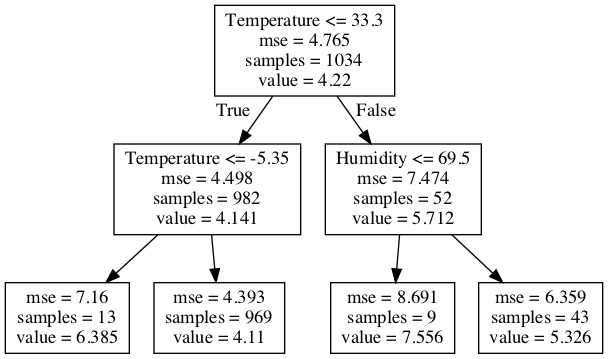

True

In [128]:
from sklearn.tree import DecisionTreeRegressor

# 사용할 독립변수와 종속변수 정의
# dtfeatures = [elem for elem in list_feat if elem not in ['custid', 'cnt_pstyr', 'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
dtfeatures = list_feat
print(dtfeatures)
tgt = 'Cnt'

dfdt = merged.copy()
dfdt.head()

dt1 = DecisionTreeRegressor(min_samples_split=20, 
                            max_depth=2, 
                            min_samples_leaf=5, 
                            random_state=99)
# print(dfdt[tgt])
dt1.fit(dfdt[dtfeatures], dfdt[tgt])
print('OK')
# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
# graphviz 가 존재하는 path를 정확하게 지정해 주어야 DT 플롯 생성됨

# import os     
# os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\envs\\dev\\Library\\bin\\graphviz'

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

print('\nDT Predicting ',tgt, '  : ')
# Show graph
Image(graph.create_png())

 

# Create PDF ...........  이 부분에 path와 파일명 (pdf) 지정해 주시면 해당 위치에 파일이 생성됩니다
graph.write_pdf(os.path.join('.',"dt_predfire.pdf"))


In [121]:
dfdt.shape

(1034, 10)

In [122]:
print(dtfeatures)
dfdt.columns

['Temperature', 'WindSpeed', 'Humidity']


Index(['Timestamp', 'Temperature', 'WindSpeed', 'Humidity', 'Time', 'Cnt',
       'DamageAmt', 'DeathToll', 'Injury', 'Month'],
      dtype='object')

## 지도 Dashboard

In [123]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
@interact
def update_map(year=['2015','2016','2017','2018','2019']):
    map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles='stamentoner')
    geo_path = './seoul_municipalities_geo_simple.json'
    geo_str = json.load(open(geo_path, encoding='utf-8'))
    
    features_len = len(geo_str['features'])

    for i in range(features_len):   
        latitude = 0
        longitude = 0
        coordinates_len = len(geo_str['features'][i]['geometry']['coordinates'][0])

        for cd in geo_str['features'][i]['geometry']['coordinates'][0]:
            latitude += cd[0]
            longitude += cd[1]

        latitude /= coordinates_len
        longitude /= coordinates_len
    
        folium.Marker([longitude,latitude], popup='<i>Count:%d</i>'%yearly_cnt[year][geo_str['features'][i]['properties']['SIG_KOR_NM']], tooltip=geo_str['features'][i]['properties']['SIG_KOR_NM']).add_to(map)
        
    map.choropleth(geo_str,
          data= yearly_cnt[year],
          columns = [yearly_cnt.index, yearly_cnt[year]],
          fill_color='YlGnBu',
          legend_name='연간 주택 화재 발생 건수',
          key_on='properties.SIG_KOR_NM')
    map.save('test.html')
    return map
    

interactive(children=(Dropdown(description='year', options=('2015', '2016', '2017', '2018', '2019'), value='20…

In [126]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

@interact
def update_map(year=['2015','2016','2017','2018']):
    subset = livingalone_df[livingalone_df['Year'] == 2016].set_index('District')
    map = folium.Map(location=[37.5502, 126.982], zoom_start=11,tiles='stamentoner')
    geo_path = './seoul_municipalities_geo_simple.json'
    geo_str = json.load(open(geo_path, encoding='utf-8'))
    
    features_len = len(geo_str['features'])

    for i in range(features_len):   
        latitude = 0
        longitude = 0
        coordinates_len = len(geo_str['features'][i]['geometry']['coordinates'][0])

        for cd in geo_str['features'][i]['geometry']['coordinates'][0]:
            latitude += cd[0]
            longitude += cd[1]

        latitude /= coordinates_len
        longitude /= coordinates_len
    
        folium.Marker([longitude,latitude], popup='<i>Count:%d</i>'%subset['LivingAlone'][geo_str['features'][i]['properties']['SIG_KOR_NM']], tooltip=geo_str['features'][i]['properties']['SIG_KOR_NM']).add_to(map)
        
    map.choropleth(geo_str,
          data= subset['LivingAlone'],
          columns = [subset.index, subset['LivingAlone']],
          fill_color='YlGnBu',
          legend_name='총1일가구수',
          key_on='properties.SIG_KOR_NM')
    map.save('test.html')
    return map
    

interactive(children=(Dropdown(description='year', options=('2015', '2016', '2017', '2018'), value='2015'), Ou…

In [328]:
livingalone_df.head()

,Year,District,GeneralFamily,LivingAlone,Percentage,GugunCode,Cnt,DeathToll,Injury
0,2015,강남구,210769.0,61362.0,0.376071,680.0,116.0,0.0,3.0
1,2015,강동구,163855.0,39684.0,0.354643,740.0,59.0,0.0,1.0
2,2015,강북구,125416.0,35561.0,0.375000,305.0,38.0,0.0,5.0
3,2015,강서구,217240.0,56629.0,0.360714,500.0,102.0,0.0,0.0
4,2015,관악구,227496.0,99208.0,0.437500,620.0,49.0,3.0,2.0


In [71]:
subset = livingalone_df[livingalone_df['Year'] == 2016].set_index('District')
subset.head(100)

,Year,GeneralFamily,LivingAlone,Percentage,GugunCode,Cnt,DeathToll,Injury
District,,,,,,,,
강남구,2016,208272.0,61426.0,0.381786,680,114,4,1
강동구,2016,159829.0,39311.0,0.358214,740,94,0,6
강북구,2016,125360.0,36469.0,0.383929,305,42,2,3
강서구,2016,222343.0,60709.0,0.371429,500,104,3,2
관악구,2016,229482.0,102919.0,0.444286,620,69,0,10
광진구,2016,145363.0,52364.0,0.417857,215,35,0,4
구로구,2016,156407.0,41812.0,0.372143,530,54,0,0
금천구,2016,93290.0,31630.0,0.423929,545,42,0,4
노원구,2016,203306.0,46395.0,0.347143,350,103,0,5


In [334]:
yearly_cnt.head()

,2015,2016,2017,2018,2019
District,,,,,
강남구,116,114,103,91,64
강동구,59,94,69,86,58
강북구,38,42,37,44,43
강서구,102,104,148,148,99
관악구,49,69,63,65,45


In [85]:
subset = livingalone_df[livingalone_df['Year'] == 2015].set_index('District')

In [82]:
subset.LivingAlone

District
강남구      61426.0
강동구      39311.0
강북구      36469.0
강서구      60709.0
관악구     102919.0
광진구      52364.0
구로구      41812.0
금천구      31630.0
노원구      46395.0
도봉구      28051.0
동대문구     50871.0
동작구      51814.0
서초구      37855.0
성동구      36196.0
성북구      52437.0
송파구      54137.0
양천구      32712.0
영등포구     49230.0
용산구      31391.0
은평구     139296.0
종로구      22309.0
중구       18854.0
중랑구      45485.0
Name: LivingAlone, dtype: float64